In [ ]:
!kaggle datasets download -d kallolnath1/covid-tested-patient-dataset

Dataset URL: https://www.kaggle.com/datasets/kallolnath1/covid-tested-patient-dataset
License(s): unknown
  0% 0.00/964k [00:00<?, ?B/s]
100% 964k/964k [00:00<00:00, 102MB/s]


In [ ]:
import numpy as numpy
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('covid-tested-patient-dataset.zip')
df.sample(3)

<ipython-input-102-26b8c0dbf746>:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('covid-tested-patient-dataset.zip')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
97379,97380,04-04-2020,False,False,False,False,False,negative,Yes,female,Other
224686,224687,22-04-2020,False,False,False,False,False,negative,NaN,female,Other
250559,250560,26-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [ ]:
df = df.set_index('Ind_ID')
df = df.drop(['Test_date', 'Age_60_above', 'Sex', 'Known_contact'], axis=1)

In [ ]:
df.isna().sum()

,0
Cough_symptoms,0
Fever,0
Sore_throat,0
Shortness_of_breath,0
Headache,0
Corona,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
# for col in df.columns:
#     print(df[col].value_counts())
#     print()

In [ ]:
for col in ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']:
    df[col] = df[col].astype(str).str.lower()
    df[col] = df[col].map({'true': 1, 'false': 0})
df['Corona'].map({'negative': 1, 'positive': 0})

,Corona
Ind_ID,
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
...,...
278844,0.0
278845,1.0
278846,1.0


In [ ]:
df.sample(10)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
Ind_ID,,,,,,
163724,0,0,0,0,0,negative
81626,0,0,0,0,0,other
209714,0,0,0,0,0,negative
208212,0,0,0,0,0,negative
110697,0,0,0,0,0,negative
237129,0,0,0,0,0,negative
196410,0,0,0,0,0,negative
150761,1,0,0,0,0,negative
214446,0,0,0,0,0,negative


In [ ]:
X = df.drop('Corona', axis=1)
Y = df['Corona']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [ ]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
clf_gini = model.fit(X_train, Y_train)

In [ ]:
y_pred = clf_gini.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred)*100)

Accuracy: 94.33350482776774


In [ ]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy = model.fit(X_train, Y_train)

In [ ]:
y_pred = clf_entropy.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred)*100)

Accuracy: 94.33350482776774


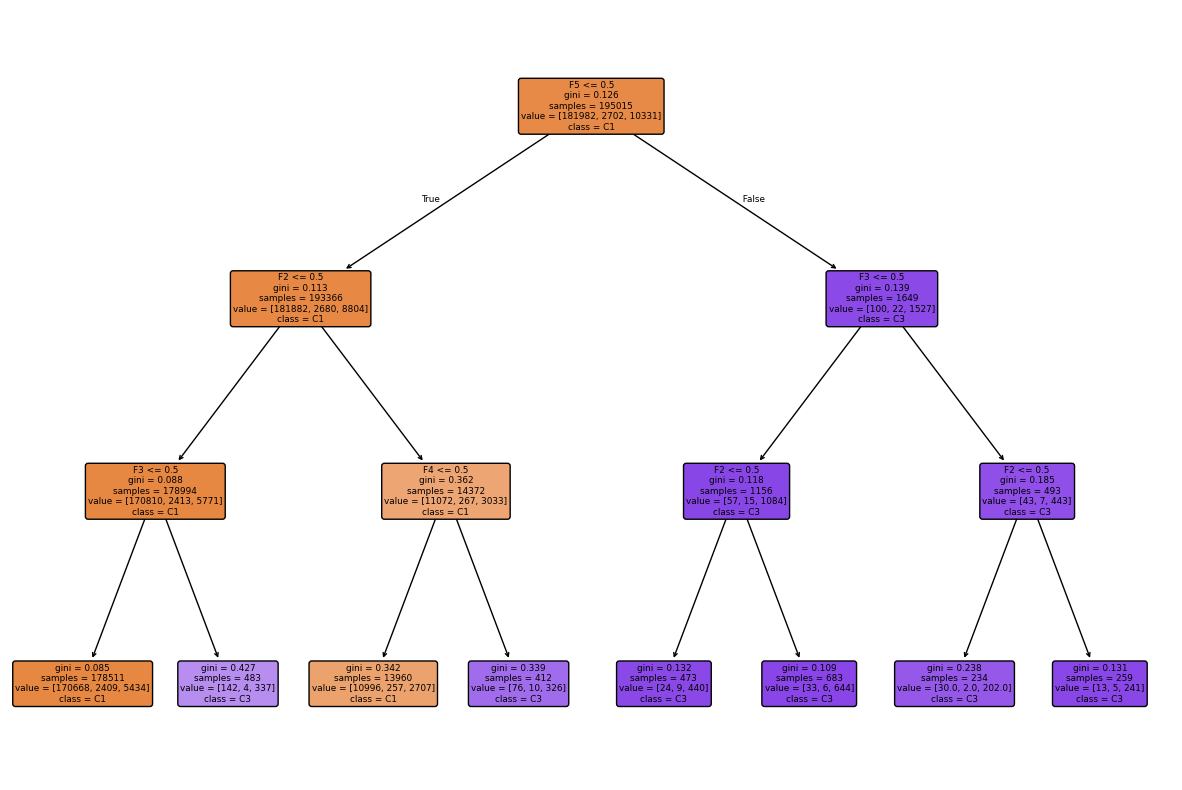

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, filled=True, feature_names=['F1', 'F2', 'F3', 'F4', 'F5'], class_names=['C1', 'C2', 'C3'], rounded=True)
plt.show()